In [26]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [27]:
# Load the Iris dataset
data = load_digits()
x, y = data.data, data.target

In [28]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
x.shape

(1797, 64)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
pred_before_pickling = svm_model.predict(x_test)

In [36]:
print(accuracy_score(y_test, pred_before_pickling))

0.9777777777777777


In [37]:
import pickle

In [38]:
# Save the trained SVM classifier to a file named "svm_model_digits.pkl"
with open("svm_model_digits.pkl", "wb") as file:
    pickle.dump(svm_model, file)

Now load model from storage

In [39]:
# Load the saved SVM classifier from the file
with open("svm_model_digits.pkl", "rb") as file:
    loaded_svm_model = pickle.load(file)

In [40]:
# Make predictions on the testing data using the loaded SVM model
y_pred = loaded_svm_model.predict(x_test)

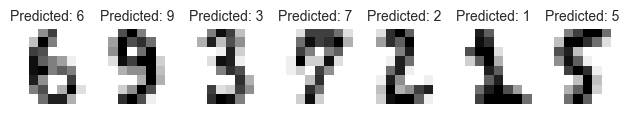

In [56]:
num_images_to_print = 7  # Change this to the number of images you want to print
for i in range(num_images_to_print):
    plt.subplot(1, num_images_to_print, i + 1)
    plt.imshow(x_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {y_pred[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout(w_pad= 1)
plt.show()

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.3f}")

Accuracy of the loaded model: 0.978


In [42]:
from fastapi import FastAPI
from zeep import Client

app = FastAPI()

# Replace with the actual SOAP service URL and XML request
SOAP_SERVICE_URL = "https://example.com/soap-service"
SOAP_REQUEST_XML = """
<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/" xmlns:web="http://www.example.com/webservice">
   <soapenv:Header/>
   <soapenv:Body>
      <web:YourSOAPRequest>
         <web:Parameter1>Value1</web:Parameter1>
         <web:Parameter2>Value2</web:Parameter2>
      </web:YourSOAPRequest>
   </soapenv:Body>
</soapenv:Envelope>
"""

@app.get("/send_soap_request")
async def send_soap_request():
    # Create a zeep SOAP client
    client = Client(SOAP_SERVICE_URL)
    
    # Send the SOAP request and get the response
    response = client.service.YourSOAPRequestMethod(__inject={'msg': SOAP_REQUEST_XML})
    
    # Process the SOAP response (this is a simplified example)
    result = response["YourSOAPResponse"]["Result"]
    
    return {"result": result}
